<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import re

from functools import reduce 
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales_vs_discount.csv',
 'test.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_orders_dataset.csv',
 'online_retail_II.xlsx',
 '1_customers_dataset.csv',
 'mock_sales_data.csv',
 'sample-sales-data.csv',
 'sales.csv',
 'sample_data']

In [3]:
df = pd.read_csv('mock_sales_data.csv')
df.head()

,Date,Price,SalesQty
0,2021-01-04,122.0,1433.0
1,2021-01-05,118.6,977.0
2,2021-01-06,125.0,1551.0
3,2021-01-07,115.2,1096.0
4,2021-01-08,118.1,1052.0


In [8]:
df.columns = [a.lower() for a in df.columns]
df = df.assign(
    date = df['date'].to_numpy().astype('datetime64[D]'),
    rev = df['price'] * df['salesqty']
)
df.head()

,date,price,salesqty,rev
0,2021-01-04,122.0,1433.0,174826.0
1,2021-01-05,118.6,977.0,115872.2
2,2021-01-06,125.0,1551.0,193875.0
3,2021-01-07,115.2,1096.0,126259.2
4,2021-01-08,118.1,1052.0,124241.2


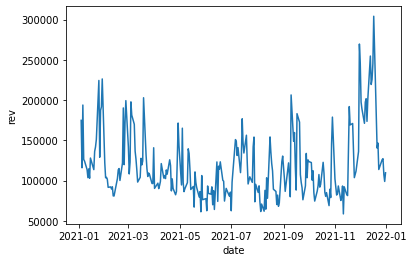

In [9]:
sns.lineplot(data = df, x = 'date', y = 'rev', markers = ['o'])

In [10]:
df.index = df['date']
df.head()

,date,price,salesqty,rev
date,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0
2021-01-05,2021-01-05,118.6,977.0,115872.2
2021-01-06,2021-01-06,125.0,1551.0,193875.0
2021-01-07,2021-01-07,115.2,1096.0,126259.2
2021-01-08,2021-01-08,118.1,1052.0,124241.2


In [14]:
df['roll_rev'] = df['rev'].rolling(window = 7).mean()
df.head()

,date,price,salesqty,rev,roll_rev
date,,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0,NaN
2021-01-05,2021-01-05,118.6,977.0,115872.2,NaN
2021-01-06,2021-01-06,125.0,1551.0,193875.0,NaN
2021-01-07,2021-01-07,115.2,1096.0,126259.2,NaN
2021-01-08,2021-01-08,118.1,1052.0,124241.2,NaN


In [18]:
cnt_roll = pd.melt(df.drop(['date'], axis = 1).reset_index(), id_vars = ['date','price','salesqty'],
        var_name = 'type')
cnt_roll.head()

,date,price,salesqty,type,value
0,2021-01-04,122.0,1433.0,rev,174826.0
1,2021-01-05,118.6,977.0,rev,115872.2
2,2021-01-06,125.0,1551.0,rev,193875.0
3,2021-01-07,115.2,1096.0,rev,126259.2
4,2021-01-08,118.1,1052.0,rev,124241.2


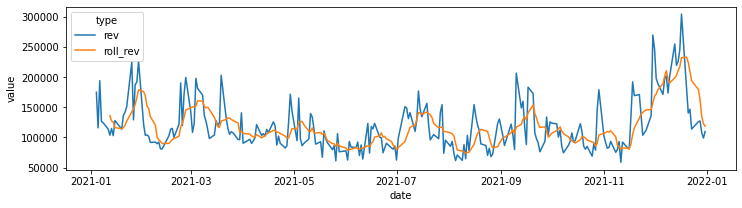

In [22]:
plt.figure(figsize = [12,3])
sns.lineplot(data = cnt_roll, x = 'date', y = 'value', hue = 'type')

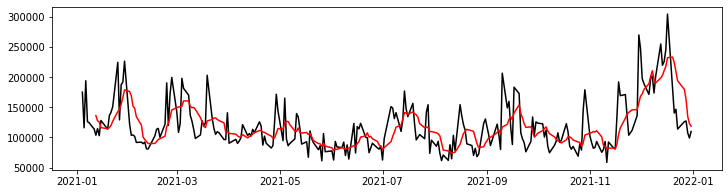

In [23]:
plt.figure(figsize = [12,3])
plt.plot(df['date'], df['rev'], color = 'black')
plt.plot(df['date'], df['roll_rev'], color = 'red')

In [24]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,date,price,salesqty,rev,roll_rev,month
date,,,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0,NaN,2021-01-01
2021-01-05,2021-01-05,118.6,977.0,115872.2,NaN,2021-01-01
2021-01-06,2021-01-06,125.0,1551.0,193875.0,NaN,2021-01-01
2021-01-07,2021-01-07,115.2,1096.0,126259.2,NaN,2021-01-01
2021-01-08,2021-01-08,118.1,1052.0,124241.2,NaN,2021-01-01


In [47]:
list_mon = dict(zip(list(range(3,13)) + list(range(1,3)),
                np.repeat(['spring', 'sumer', 'fall', 'winter'], 3) 
                ))

cnt_month = df.groupby(['month'])['rev'].sum().reset_index()
cnt_month['mon'] = cnt_month['month'].dt.month

cnt_month['season'] = cnt_month['mon'].apply(lambda x : list_mon.get(x, x))
cnt_month.head()

,month,rev,mon,season
0,2021-01-01,2798915.0,1,winter
1,2021-02-01,2192160.5,2,winter
2,2021-03-01,2977435.2,3,spring
3,2021-04-01,2257781.2,4,spring
4,2021-05-01,1976450.8,5,spring


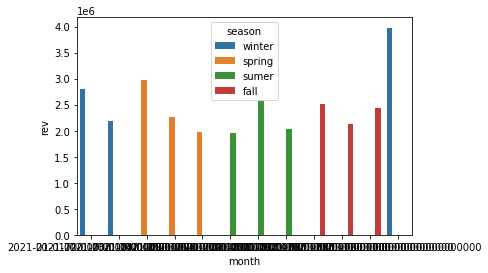

In [48]:
sns.barplot(data = cnt_month, x = 'month', y = 'rev', hue = 'season')

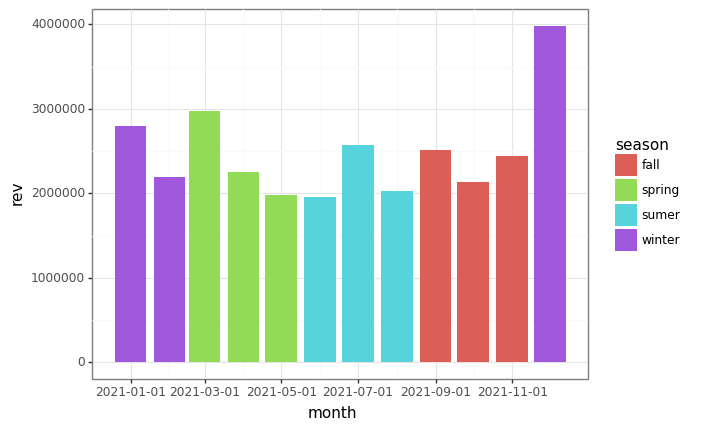

<ggplot: (8770652898357)>

In [50]:
(
    ggplot(cnt_month, aes('month', 'rev', fill = 'season')) +
    gg.geom_col() + 
    gg.theme_bw()
)

# Iterator

In [52]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3, 3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [84]:
names = np.random.choice(['kang', 'kim', 'park'], 100, replace = True)

def get_score(names) :

  uniques, counts = np.unique(names, return_counts = True)
  unique = dict(zip(uniques, counts))

  res = list()

  for k, v in unique.items() :

    m = np.random.normal(50, 30, 1)
    s = np.random.normal(10, 10, 1)
    score = [abs(a) if a <= 100 else 100 for a in np.random.normal(m, abs(s), v)]
    # score = [a if a >= 100 else 0 for a in score]

    temp = pd.DataFrame({'name' : np.repeat(k, v),
                         'score' : score
                         })
    res.append(temp)

  res = pd.concat(res)
  res.reset_index().drop(['index'], axis = 1, inplace = True)

  return res

res = get_score(names)
res.head()

,name,score
0,kang,41.023891
1,kang,40.801292
2,kang,12.274371
3,kang,13.129588
4,kang,45.260658


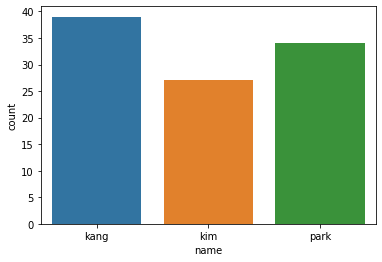

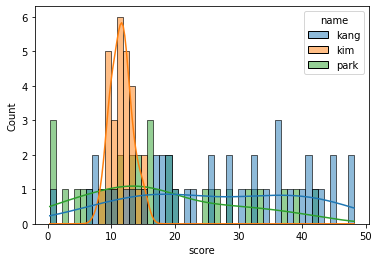

In [85]:
sns.countplot(data = res, x = 'name')
plt.show()
sns.histplot(data = res.reset_index(), x = 'score', hue = 'name', kde = True, bins = 50)
plt.show()